In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import seaborn as sns
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#turning my csv data to a dataframe ...
data = pd.read_csv("Stores.csv")
data.head(15)

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1,1659,1961,530,66490
1,2,1461,1752,210,39820
2,3,1340,1609,720,54010
3,4,1451,1748,620,53730
4,5,1770,2111,450,46620
5,6,1442,1733,760,45260
6,7,1542,1858,1030,72240
7,8,1261,1507,1020,37720
8,9,1090,1321,680,46310
9,10,1030,1235,1130,44150


In [ ]:
x = [['Store_Area','Items_Available','Daily_Customer_Count']]
y = [['Store_Sales']]
print (x)
print(y)

[['Store_Area', 'Items_Available', 'Daily_Customer_Count']]
[['Store_Sales']]


In [ ]:
import matplotlib as mpl
mpl.rcParams["font.sans-serif"] = [u'simHei'] # 设置字符集，防止中文乱码
mpl.rcParams["axes.unicode_minus"] = False

In [ ]:
data.describe()

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
count,896.000000,896.000000,896.000000,896.000000,896.000000
mean,448.500000,1485.409598,1782.035714,786.350446,59351.305804
std,258.797218,250.237011,299.872053,265.389281,17190.741895
min,1.000000,775.000000,932.000000,10.000000,14920.000000
25%,224.750000,1316.750000,1575.500000,600.000000,46530.000000
50%,448.500000,1477.000000,1773.500000,780.000000,58605.000000
75%,672.250000,1653.500000,1982.750000,970.000000,71872.500000
max,896.000000,2229.000000,2667.000000,1560.000000,116320.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 896 entries, 0 to 895
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Store ID              896 non-null    int64
 1   Store_Area            896 non-null    int64
 2   Items_Available       896 non-null    int64
 3   Daily_Customer_Count  896 non-null    int64
 4   Store_Sales           896 non-null    int64
dtypes: int64(5)
memory usage: 35.1 KB


In [ ]:
print(data.shape)

(896, 5)


In [ ]:
display([y])

[[['Store_Sales']]]

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


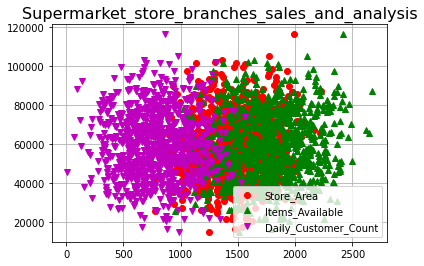

In [ ]:
plt.plot(data['Store_Area'],data['Store_Sales'],'ro',label ='Store_Area')
plt.plot(data['Items_Available'],data['Store_Sales'],'g^',label ='Items_Available')
plt.plot(data['Daily_Customer_Count'],data['Store_Sales'],'mv',label ='Daily_Customer_Count')
plt.title('Supermarket_store_branches_sales_and_analysis',fontsize = 16 )
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


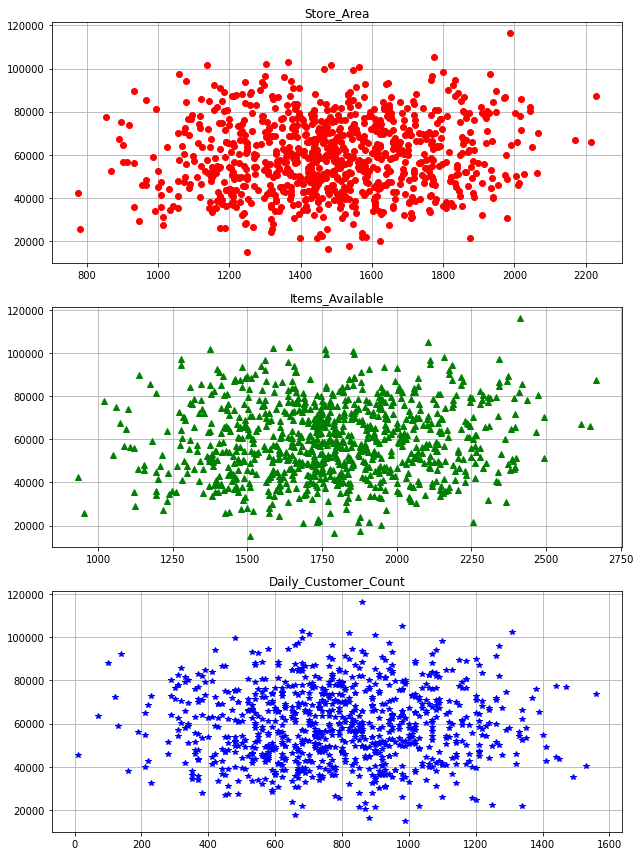

In [ ]:
plt.figure(figsize=(9,12))
plt.subplot(311)
plt.plot(data['Store_Area'], data['Store_Sales'],'ro')
plt.title('Store_Area')
plt.grid()

plt.subplot(312)
plt.plot(data['Items_Available'],data['Store_Sales'] ,'g^')
plt.title('Items_Available')
plt.grid()

plt.subplot(313)
plt.plot(data['Daily_Customer_Count'],data['Store_Sales'] , 'b*')
plt.title('Daily_Customer_Count')
plt.grid()
plt.tight_layout()
plt.show()

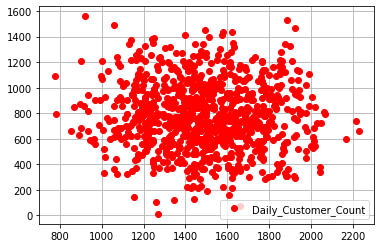

In [ ]:
plt.plot(data['Store_Area'],data['Daily_Customer_Count'],'ro',label ='Daily_Customer_Count')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

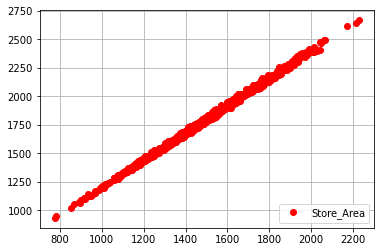

In [ ]:
plt.plot(data['Store_Area'],data['Items_Available'],'ro',label ='Store_Area')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

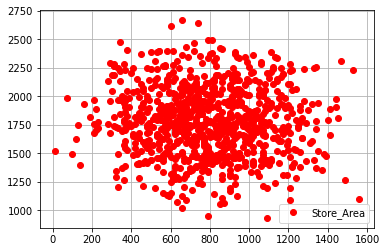

In [ ]:
plt.plot(data['Daily_Customer_Count'],data['Items_Available'],'ro',label ='Store_Area')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

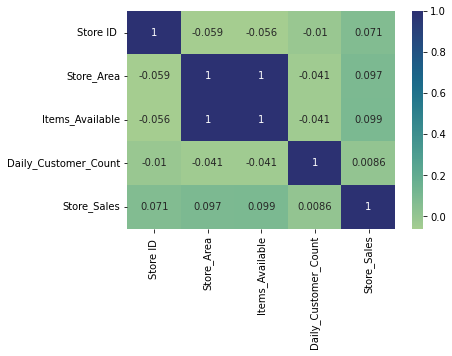

In [ ]:
import seaborn as sns
corr = data.corr()
sns.heatmap(corr, annot = True,cmap='crest',#
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

In [ ]:
corr = data.corr()
print(corr['Store_Sales'])

Store ID                0.071486
Store_Area              0.097474
Items_Available         0.098849
Daily_Customer_Count    0.008629
Store_Sales             1.000000
Name: Store_Sales, dtype: float64


In [ ]:
LargestSales = pd.DataFrame(data.nlargest(5,['Store_Sales']))
LargestSales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
649,650,1989,2414,860,116320
868,869,1775,2104,980,105150
432,433,1365,1638,680,102920
408,409,1303,1587,1310,102310
758,759,1486,1758,820,101820


In [ ]:
SmallestSales = pd.DataFrame(data.nsmallest(5,['Store_Sales']))
SmallestSales

,Store ID,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
31,32,1250,1508,990,14920
852,853,1477,1790,880,16370
775,776,1537,1877,660,17670
593,594,1624,1946,870,20270
352,353,1397,1686,850,21300


**Predictive analysis**

In [ ]:
#using linear regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score

In [ ]:
data.drop(data.columns[[0]],axis = 1,inplace = True)
data

,Store_Area,Items_Available,Daily_Customer_Count,Store_Sales
0,1659,1961,530,66490
1,1461,1752,210,39820
2,1340,1609,720,54010
3,1451,1748,620,53730
4,1770,2111,450,46620
...,...,...,...,...
891,1582,1910,1080,66390
892,1387,1663,850,82080
893,1200,1436,1060,76440
894,1299,1560,770,96610


In [ ]:
x= data.drop(['Store_Sales'],axis = 1)
y = data['Store_Sales']
y

0      66490
1      39820
2      54010
3      53730
4      46620
       ...  
891    66390
892    82080
893    76440
894    96610
895    54340
Name: Store_Sales, Length: 896, dtype: int64

In [ ]:
x_train,x_test,y_train,y_test =train_test_split(x, y, test_size=0.2,random_state=0)
print("x_train:",x_train.shape)
print("x_test:",x_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)
print(len(x_train),len(y_train))

x_train: (716, 3)
x_test: (180, 3)
y_train: (716,)
y_test: (180,)
716 716


In [ ]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)

LinearRegression()

In [ ]:
model =linreg.fit(x_train,y_train)
print('linregtheta =',linreg.coef_)
print()
print("linreg  = ",linreg.intercept_)

linregtheta = [-42.82697366  40.32997434   2.04694931]

linreg  =  49719.576190523076


In [ ]:
y_hat =linreg.predict(np.array(x_test))
mse = np.average((y_hat - np.array(y_test))**2)                                  # Mean Squared Error
rmse = np.sqrt(mse)                                                              # Root Mean Squared Error 
print('MSE=',mse)
print()
print(mse,rmse)

MSE= 275058660.3135971

275058660.3135971 16584.89253247054


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(f'MAE: {mean_absolute_error(y_test, y_hat)}')

MAE: 13461.24603485672


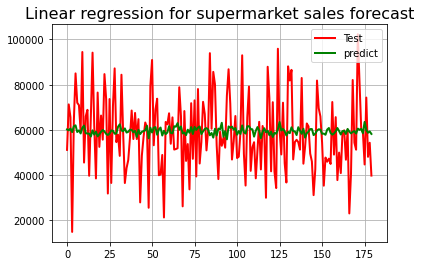

In [ ]:
t= np.arange(len(x_test))
plt.plot(t,y_test,'r-',linewidth = 2,label = 'Test')
plt.plot(t,y_hat,'g-',linewidth = 2,label = 'predict')
plt.title("Linear regression for supermarket sales forecast",fontsize = 16)
plt.legend(loc = 'upper right')
plt.grid()
plt.show()